<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/PricebyVolume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
#Price by Volume Chart (PBV)

A price by volume (PBV) chart is a horizontal histogram plotted on a security's chart, showing the volume of shares traded at a specific price level.

https://www.investopedia.com/terms/p/pricebyvolume.asp 

In [3]:
import pandas as pd
import numpy as np
from scipy import stats, signal
import plotly.express as px
import plotly.graph_objects as go

import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt

In [277]:
# Get the stock quote
df = web.DataReader('EC', data_source='yahoo',start='2019-01-01', end='2021-03-12')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,16.580000,15.510000,15.600000,16.459999,1087400.0,13.652659
2019-01-03,16.879999,16.330000,16.559999,16.500000,1099200.0,13.685839
2019-01-04,17.570000,16.840000,16.879999,17.510000,1240100.0,14.523579
2019-01-07,17.900000,17.360001,17.480000,17.770000,586500.0,14.739234
2019-01-08,18.299999,17.760000,18.030001,18.280001,760000.0,15.162251
...,...,...,...,...,...,...
2021-03-08,13.390000,12.950000,13.360000,13.030000,1235900.0,13.030000
2021-03-09,13.160000,12.830000,13.030000,12.970000,1245400.0,12.970000
2021-03-10,13.440000,12.950000,13.080000,13.370000,998800.0,13.370000


In [278]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
start_price = df['Adj_Close'].min()
stop_price = df['Adj_Close'].max()

low = start_price
# delta means granularity in volume aggregation range, it is delta in price
# the volume corresponds to price
delta = (stop_price - start_price)/50    # here we are splitting whole price range into blocks
high = 0

idx_array = []
vol_array = []
low_array = []

while high < stop_price:
    volume = 0    
    high = low + delta
    
    sub_df = df.loc[df['Adj_Close'].between(low, high, inclusive=False)]
    low_array.append(low)

    for i in sub_df.index.values:
        volume = volume + df['Volume'][i]
            
    vol_array.append(volume)
    low = high
   
for idx, var in enumerate(vol_array):
    #print("{}: {}".format(idx, var))
    idx_array.append(idx)

In [279]:
total_vol = 0
for i in range(0,len(df)):
  total_vol = total_vol + df['Volume'][i]
print(total_vol)

507545977.0


In [280]:
def tas_box(percentile):
  vol = 0
  for i in range(0,len(df)):
    vol = vol + vol_array[i]
    temp = vol/total_vol
    if temp >= percentile:
      return low_array[i] 

X95 = tas_box(0.95)
X90 = tas_box(0.90)
X50 = tas_box(0.50)
X10 = tas_box(0.10)
X05 = tas_box(0.05)

<Figure size 2400x2400 with 0 Axes>

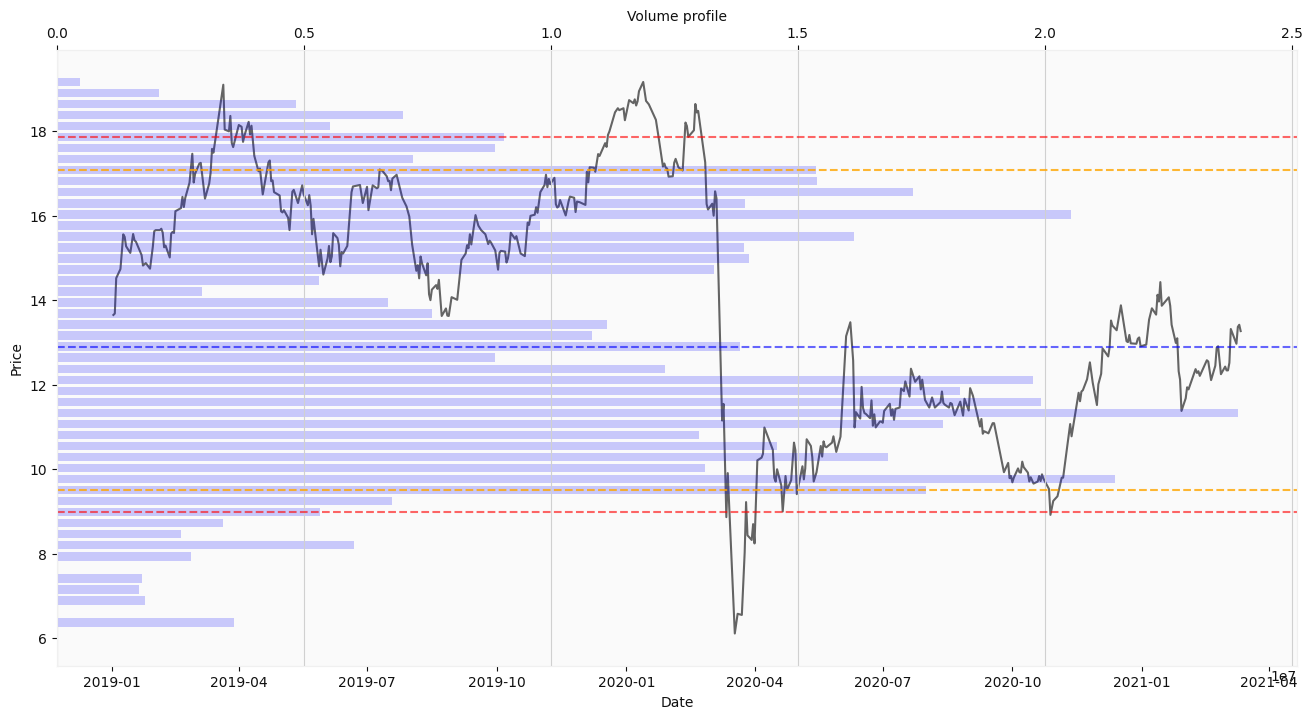

In [281]:
#price and corresponding partial volume profile
plt.figure(figsize=(20, 20), dpi= 120, facecolor='w', edgecolor='k')

#price
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(df.index, df['Adj_Close'], alpha=0.6, color='black')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')

#PricebyVolume 
ax.twiny()
h = int(df['Adj_Close'].max()/100) + 0.2
plt.barh(low_array, vol_array, alpha = 0.2, color='blue', height=h)
plt.axhline(X95, linestyle='--', alpha = 0.6, color = 'red')
plt.axhline(X90, linestyle='--', alpha = 0.8, color = 'orange')
plt.axhline(X50, linestyle='--', alpha = 0.6, color = 'blue')
plt.axhline(X10, linestyle='--', alpha = 0.8, color = 'orange')
plt.axhline(X05, linestyle='--', alpha = 0.6, color = 'red')
plt.xlabel('Volume profile')
plt.ylabel('Price')

plt.show()

Text(0, 0.5, 'Price')

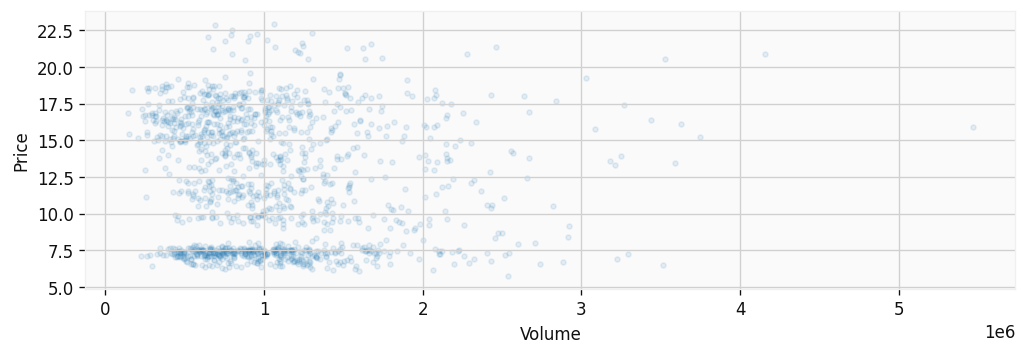

In [204]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
plt.figure(figsize=(10, 3), dpi= 120, facecolor='w', edgecolor='k')
plt.scatter(df.Volume, df.Adj_Close, alpha=0.1, marker='.')
plt.xlabel('Volume')
plt.ylabel('Price')